<a href="https://colab.research.google.com/github/pkRaksha/Classification/blob/main/Team_Classification%7CBank_Marketing_Effectiveness.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - 
Bank Marketing Effectiveness Prediction


##### **Project Type**    - Classification
##### **Contribution**    - Team
##### **Team Member 1 -**  Ankit Anand
##### **Team Member 2 -**  Raksha

# **Project Summary -**

The Project is a Classification project, the data set used here is related to a marketing campaign of a Portuguese Bank. The Insights of the data are gained by performing EDA. Before EDA , the data is cleaned , all the null values and Duplicate values are dealt. Essential Visualisations are done to understand the data and gain insights to answer certain questions. 
Multicollinearity and VIF are performed to understand the correlation of the data.  

Before Implementing the classification models, data was supposed to be balanced. SMOTE is used to balance the data and then the classification models are used to fit our data and make predictions.

Following models have been used for predictions:-

*   Logistic Regression Classifier
*   Decision Tree Classifier
*   Random Forest Classifier
*   K-Nearest Neighbors Classifier
*   Naive Bayes Classifier
*   Support Vector Machine Classifier
*   LGBM Classifier



# **GitHub Link -**

https://github.com/pkRaksha/Classification

# **Problem Statement**


The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. The classification goal is to predict if the client will subscribe a term deposit (variable y).

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries

import pandas as pd
import numpy as np
from datetime import datetime
import datetime as dt

import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import seaborn as sns

### Dataset Loading

In [ ]:
# Mounting the Google Drive to access data.

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# Loading the dataset

file_path = '/content/drive/MyDrive/EDA datasets/Classification/bank-full.csv'

df = pd.read_csv(file_path, sep = ";")

### Dataset First View

In [ ]:
# Dataset First Look
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
df.shape

(45211, 17)

### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
df.duplicated().sum()

0

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

### What did you know about your dataset?

* **Our dataset has no null and duplicate values**
* **Our dataset has a total of 45211 rows and 17 independent features**
* **Our response variable is the 'y' column**

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [ ]:
# Dataset Describe
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


### Variables Description 

## <b>Input variables: </b>
### <b> Bank Client data: </b>

* **age** (numeric)
* **job** : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
* **marital** : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
* **education** (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
* **default**: has credit in default? (categorical: 'no','yes','unknown')
* **housing**: has housing loan? (categorical: 'no','yes','unknown')
* **loan**: has personal loan? (categorical: 'no','yes','unknown')

### <b> Related with the last contact of the current campaign:</b>
* **contact**: contact communication type (categorical: 'cellular','telephone')
* **month**: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
* **day_of_week**: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
* **duration**: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

### <b>Other attributes: </b>
* **campaign**: number of contacts performed during this campaign and for this client (numeric, includes last contact)
* **pdays**: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
* **previous**: number of contacts performed before this campaign and for this client (numeric)
* **poutcome**: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')


### <b>Output variable (desired target):</b>
* **y** - has the client subscribed a term deposit? (binary: 'yes','no')

## 3. ***Data Wrangling***

### Data Wrangling Code

*We have two types of variables in our data set. These are Numerical Variables and Categorical Variables.*

In [ ]:
#checking the statistical info of the data 
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


**Splitting the data in numerical and categorical**

In [ ]:
# Finding categorical variables

categorical_features=[feature for feature in df.columns if (df[feature].dtypes=='O')]
print(f'There are {len(categorical_features)} categorical variables')
categorical_features

There are 10 categorical variables


['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'y']

In [ ]:
# Checking the head of the categorical features

df[categorical_features].head()

,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,management,married,tertiary,no,yes,no,unknown,may,unknown,no
1,technician,single,secondary,no,yes,no,unknown,may,unknown,no
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown,no
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown,no
4,unknown,single,unknown,no,no,no,unknown,may,unknown,no


In [ ]:
# Finding numerical variables

numerical_features = [feature for feature in df.columns if (df[feature].dtypes != 'O' )]
print(f'There are {len(numerical_features)} numerical variables')
numerical_features

There are 7 numerical variables


['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [ ]:
# Checking the head of the numerical features

df[numerical_features].head()

,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
3,47,1506,5,92,1,-1,0
4,33,1,5,198,1,-1,0


**After splitting our dataset we saw that there are 10 categorical variables and 7 numerical variables**

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

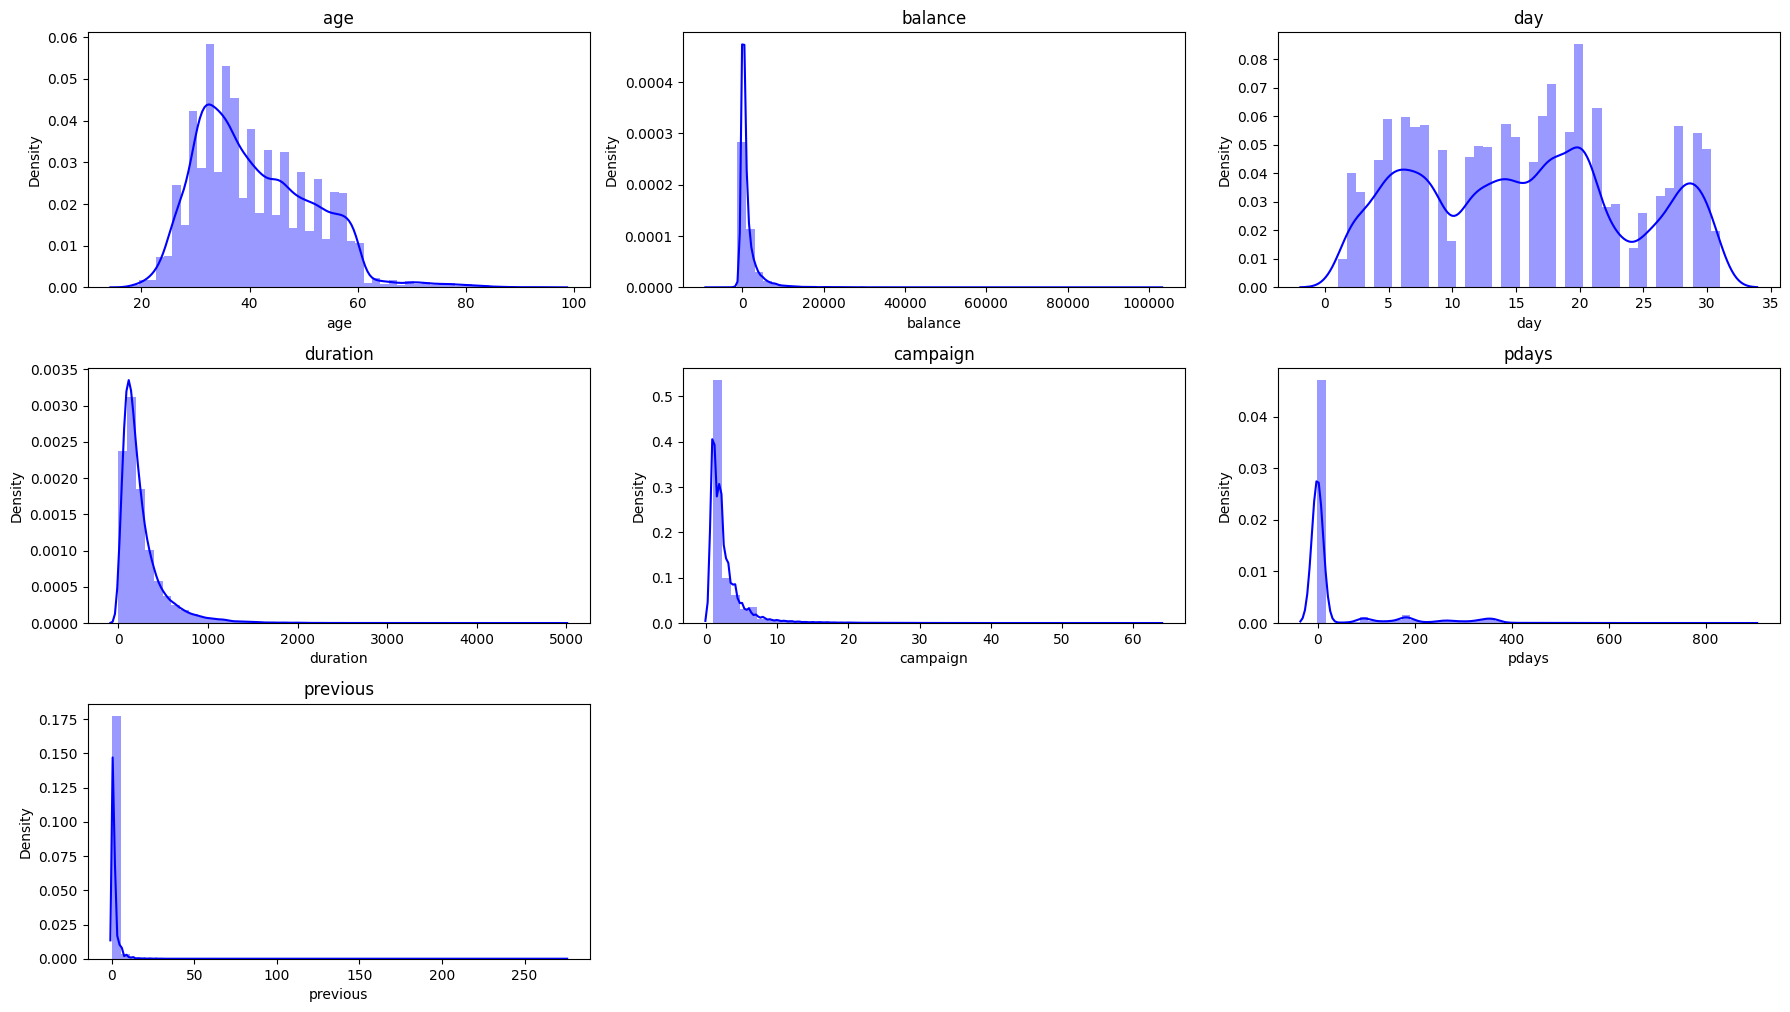

In [ ]:
# Distibution plot of Numerical features to check the skewness.

n=1
plt.figure(figsize=(18,40))
for i in numerical_features:
  plt.subplot(12,3,n)
  n= n+1
  sns.distplot(df[i],color='blue')
  plt.title(i)
  plt.tight_layout()

**We observed from the above distibution plot of numerical features that the attributes balance, duration, campaign, pdays, and previous are right skewed.**

#### Chart - 2

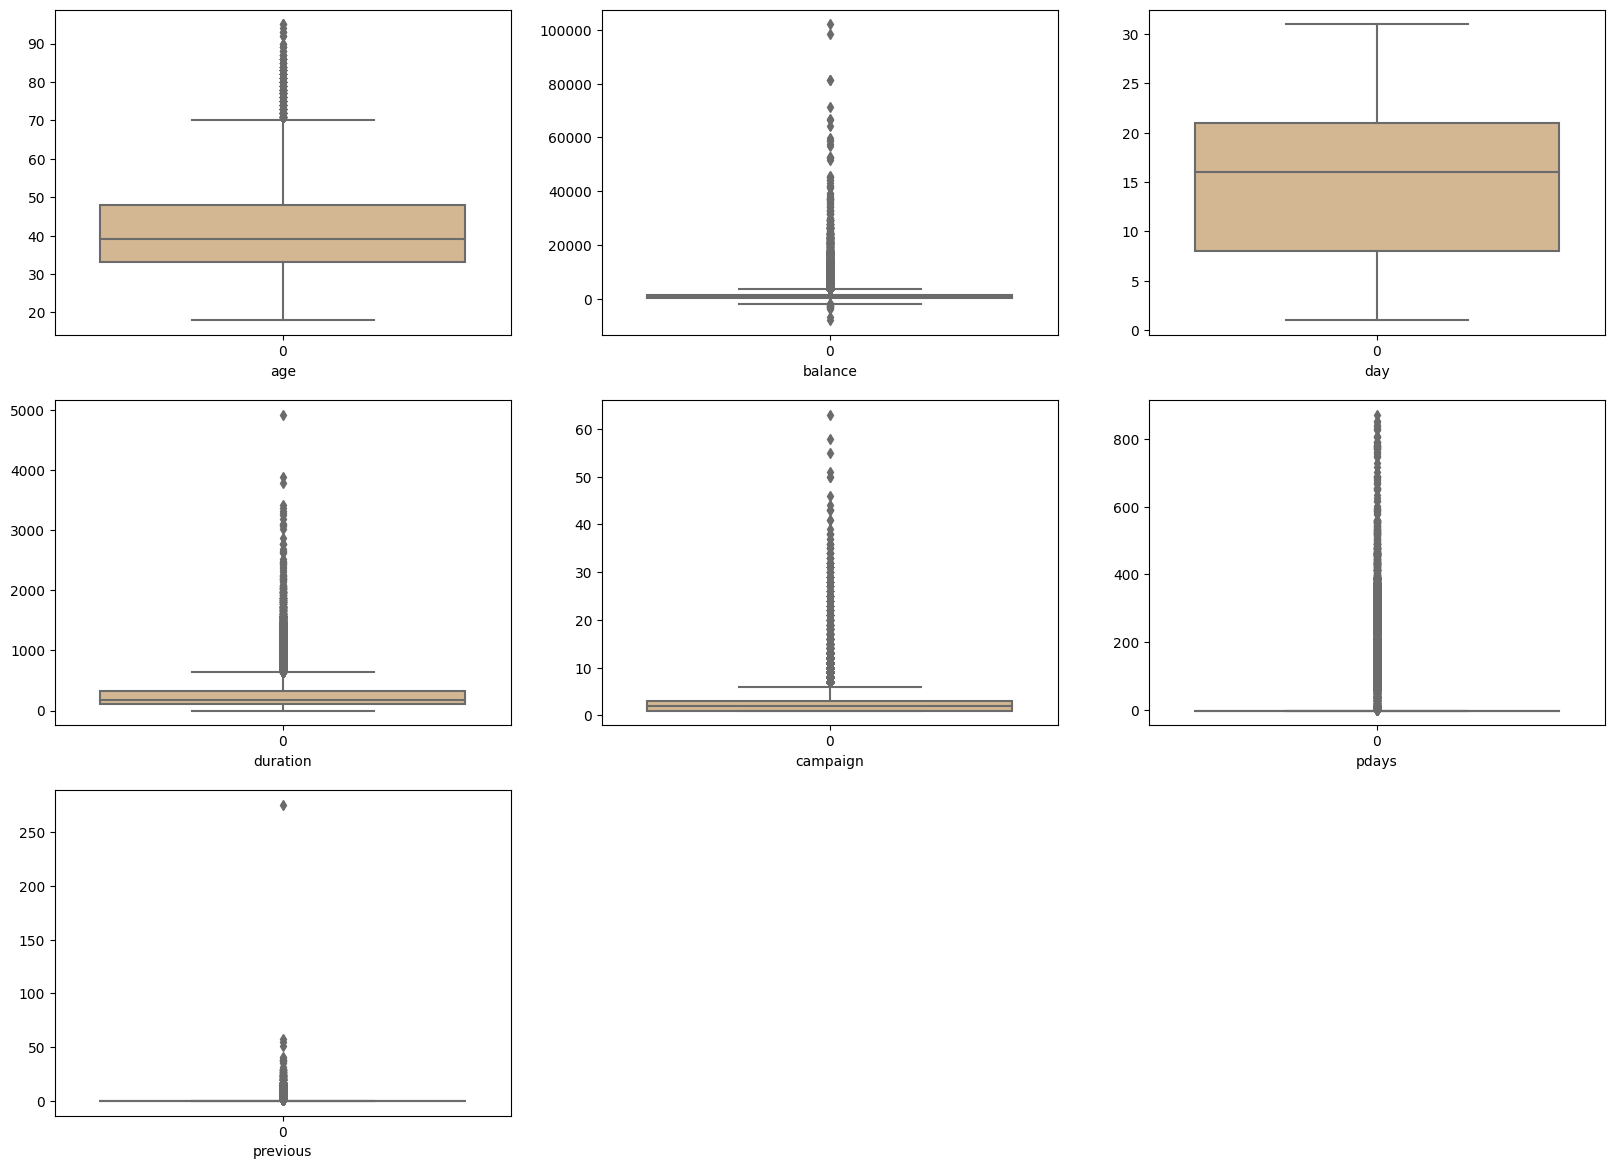

In [ ]:
# ploting a boxplot for each numerical feature to check the outliers

plt.figure(figsize=(20,60), facecolor='white')
plotnumber = 1
for numerical_feature in numerical_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(df[numerical_feature], color='#DEB887')
    plt.xlabel(numerical_feature)
    plotnumber += 1
plt.show()


***After plotting the boxplot for the outliers in our dataset, we observed that there are outliers present in all our numerical features except day feature.***

#### Chart - 3

Text(0.5, 1.0, 'Count on the basis of day')

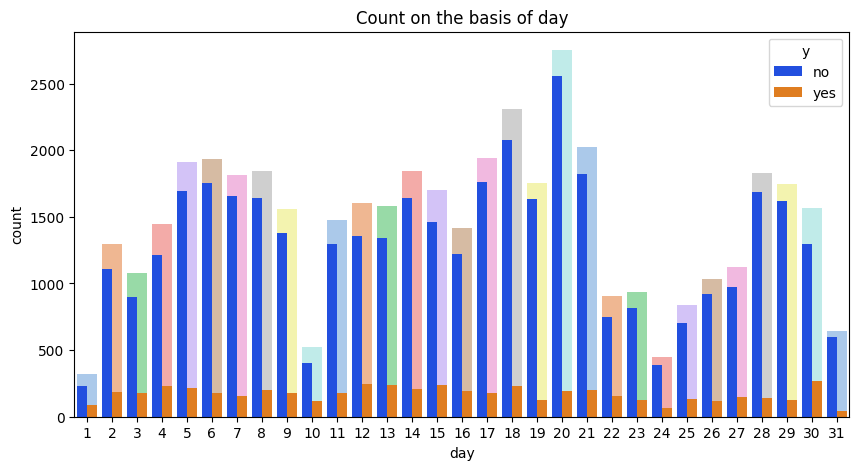

In [ ]:
# plotting count plot of days with taget variable
y = df.y
fig, ax = plt.subplots(figsize=(10,5))
sns.countplot(x=df.day, ax=ax, palette='pastel')
sns.countplot(x = df.day, hue=df.y, ax=ax, palette='bright')
plt.xlabel('day')
plt.title('Count on the basis of day')

**Observation** - we can see that majority of subscription on 20th date of every month followed by 18th & least on 1st & 24th. 

#### Chart - 4

Text(0.5, 1.0, 'Count on the basis of campaign')

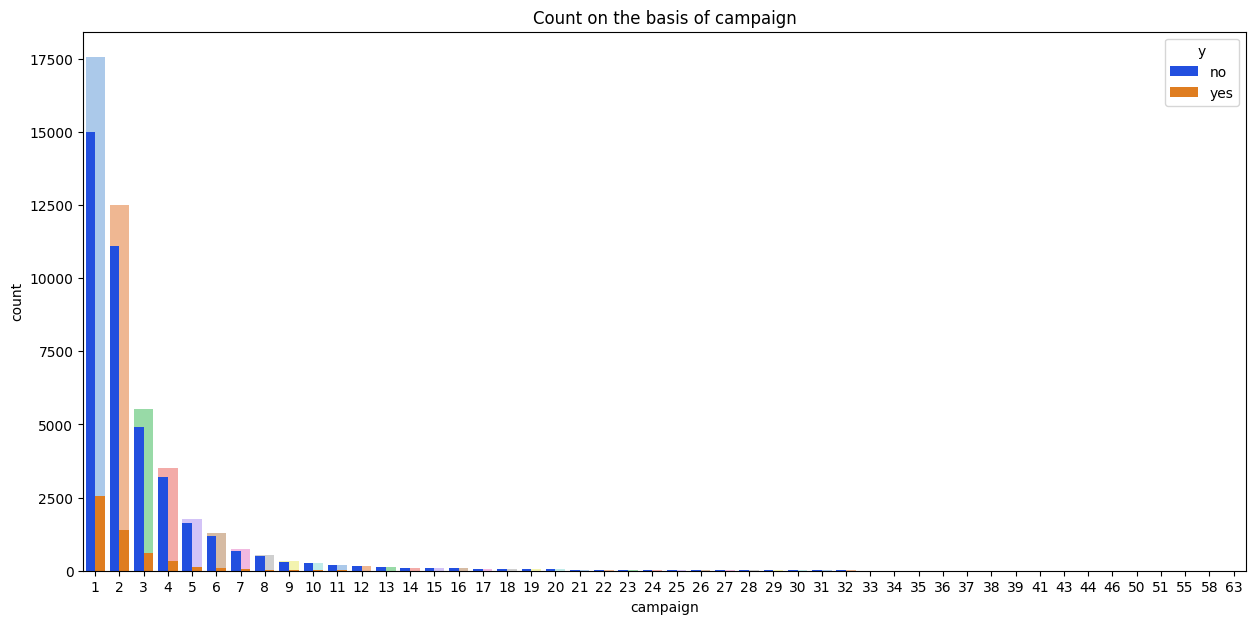

In [ ]:
# plotting count plot of campaign with taget variable

fig, ax = plt.subplots(figsize=(15,7))
sns.countplot(x=df.campaign, ax=ax, palette='pastel')
sns.countplot(x= df.campaign, hue=df.y,ax=ax, palette='bright')
plt.xlabel('campaign')
plt.title('Count on the basis of campaign')

**Observation** - People were mostly contacted one time but some people also connect more than once.

#### Chart - 5

Text(0.5, 1.0, 'Count on the basis of previous')

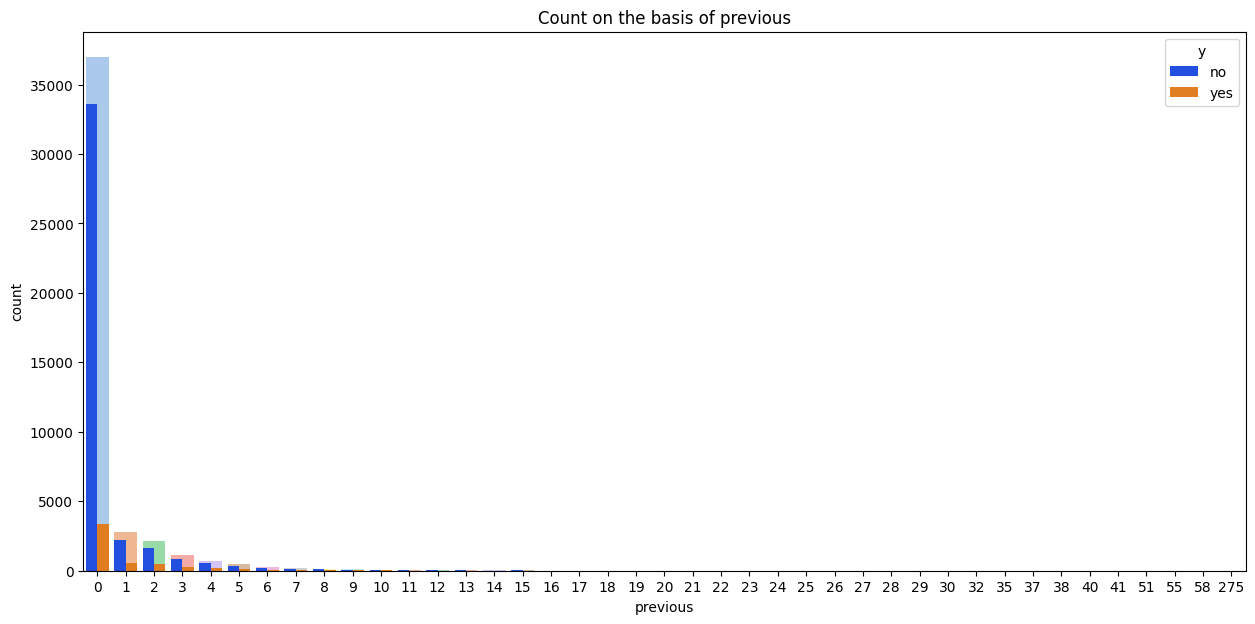

In [ ]:
# plotting count plot of previous with taget variable

fig, ax = plt.subplots(figsize=(15,7))
sns.countplot(x=df.previous, ax=ax, palette='pastel')
sns.countplot(x=df.previous, hue=df.y,ax=ax, palette='bright')
plt.xlabel('previous')
plt.title('Count on the basis of previous')

**Observation** - We can see above that majority of people were not contacted previously before this campaign and there are no significant contacts after 10 times already done.

#### Chart - 6

Text(0.5, 1.0, 'Count of different type of jobs')

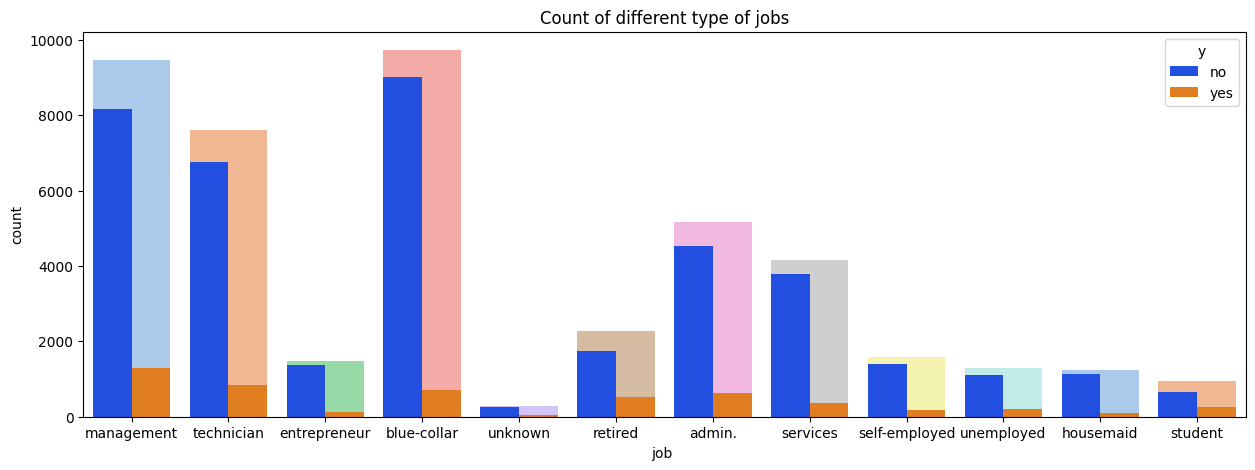

In [ ]:
# Lets explore the count of accept and reject term deposit on the basis of different type of job

fig, ax = plt.subplots(figsize=(15,5))
sns.countplot(x=df.job, ax=ax, palette='pastel')
sns.countplot(x=df.job, hue=df.y,ax=ax, palette='bright')
plt.xlabel('job ')
plt.title('Count of different type of jobs')

**Observation** - Management & Blue-collar have highest value count

Blue-collar, management & technician showed maximum interest in subscription.

#### Chart - 7

Text(0.5, 1.0, 'Count of people with different marital status')

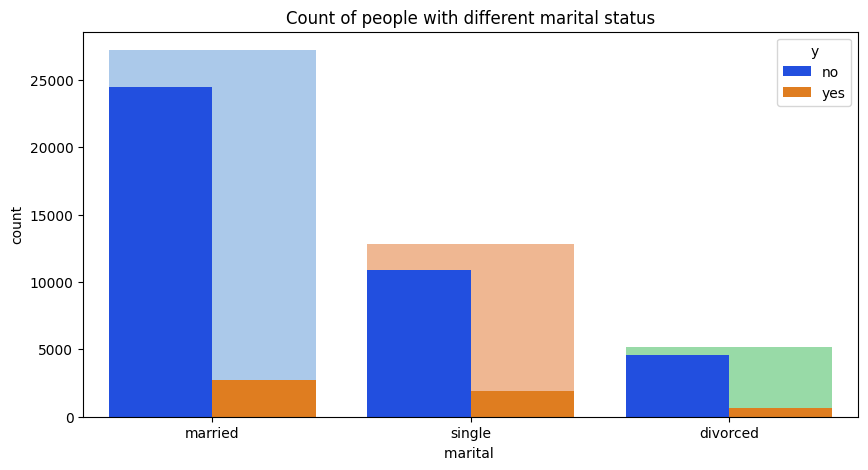

In [ ]:
# plotting the count plot of marital status with target variable.

fig, ax = plt.subplots(figsize=(10,5))
sns.countplot(x=df.marital, ax=ax, palette='pastel')
sns.countplot(x=df.marital, hue=df.y,ax=ax, palette='bright')
plt.xlabel('marital ')
plt.title('Count of people with different marital status')

**observations** - we can see by looking at chart that in maritial status, "**married**" people having the highest number of count in the data set followed by "**single**" and least "**divorced**". 

"**married**" people are also having the maximum number of subscriptions followed by "**single**".

#### Chart - 8

Text(0.5, 1.0, 'Count of yes and no for different education level')

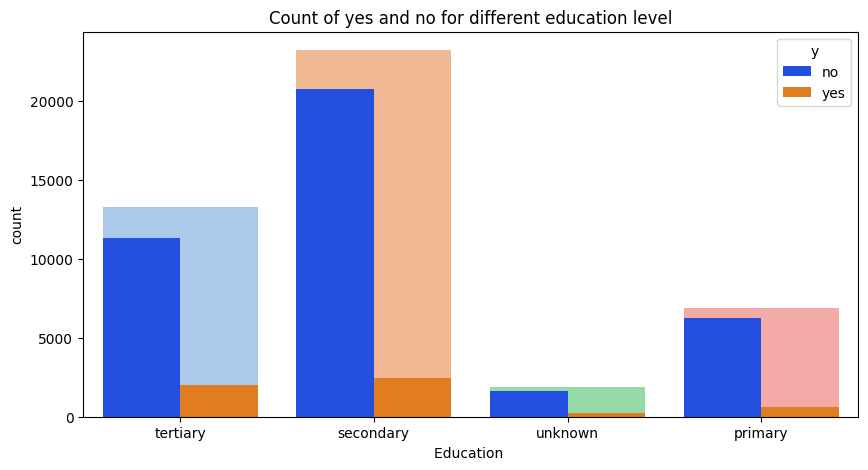

In [ ]:
# plotting the count plot of education  with target variable.

fig, ax = plt.subplots(figsize=(10,5))
sns.countplot(x=df.education, ax=ax, palette='pastel')
sns.countplot(x=df.education, hue=df.y,ax=ax, palette='bright')
plt.xlabel('Education ')
plt.title('Count of yes and no for different education level')

**Observation** - Secondary education is having the highest number of count &
People with secondary education were more driven towards subscribe to term deposit in bank as comparison to primary, tertiary and some unknown education.

#### Chart - 9

Text(0.5, 1.0, 'Count of yes and no for different default')

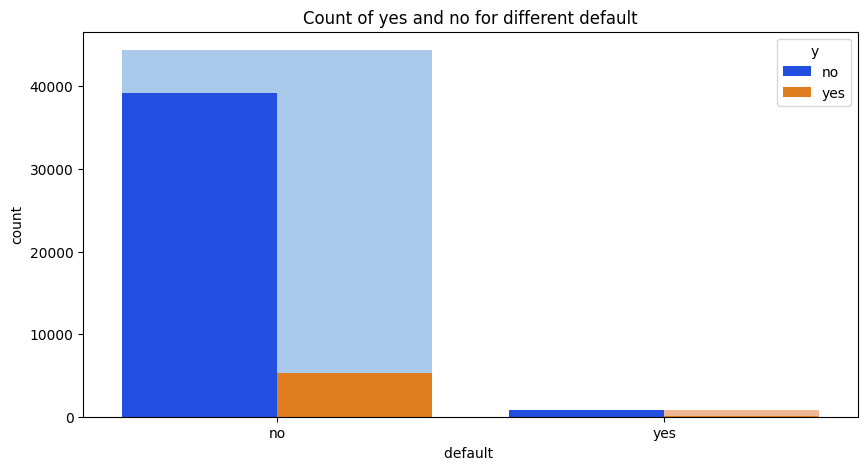

In [ ]:
# plotting the count plot of credit card default with target variable.

fig, ax = plt.subplots(figsize=(10,5))
sns.countplot(x=df.default, ax=ax, palette='pastel')
sns.countplot(x=df.default, hue=df.y,ax=ax, palette='bright')
plt.xlabel('default ')
plt.title('Count of yes and no for different default')

**Observation** - we can see by above chart that those who are not defaulter are having more count than those who are defaulters. and those who are not defaulters are likely  not intersted in term deposit only some people are intersted in term deposit.

#### Chart - 10

Text(0.5, 1.0, 'Count of yes and no for different housing')

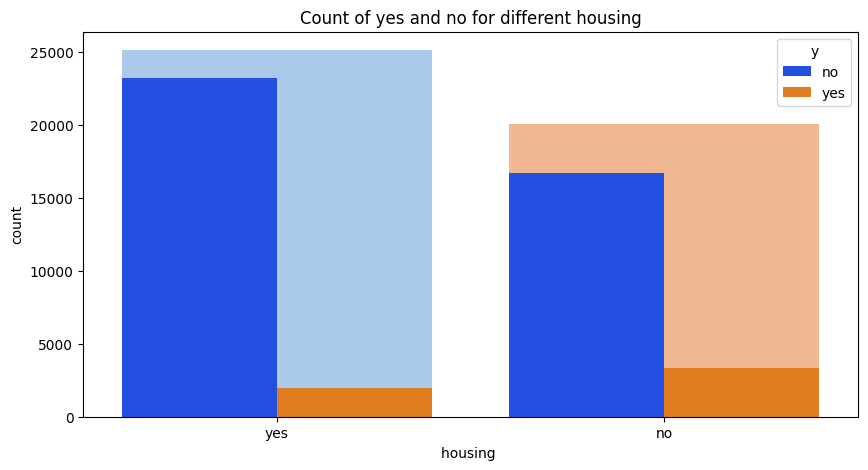

In [ ]:
# plotting the count plot of housing loan with target variable.

fig, ax = plt.subplots(figsize=(10,5))
sns.countplot(x=df.housing, ax=ax, palette='pastel')
sns.countplot(x=df.housing, hue=df.y,ax=ax, palette='bright')
plt.xlabel('housing ')
plt.title('Count of yes and no for different housing')

 **Observation** - Most of the clients have home loan but only few of them opted for term deposit.

#### Chart - 11

Text(0.5, 1.0, 'Count of yes and no for loan')

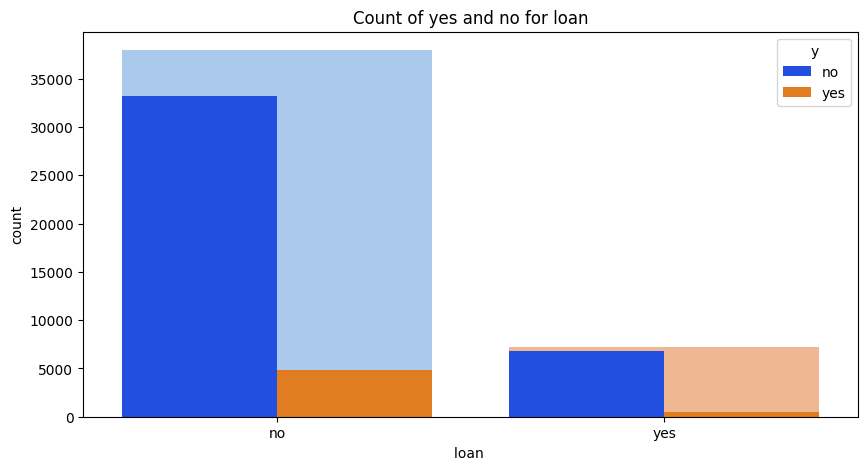

In [ ]:
# plotting the count plot of personal loan with target variable.

fig, ax = plt.subplots(figsize=(10,5))
sns.countplot(x=df.loan, ax=ax, palette='pastel')
sns.countplot(x=df.loan, hue=df.y,ax=ax, palette='bright')
plt.xlabel('loan ')
plt.title('Count of yes and no for loan')

 **Observation** - Most of the clients do not  have *personal* loan but only few of them opted for term deposit.

#### Chart - 12

Text(0.5, 1.0, 'Count of different types of contact type')

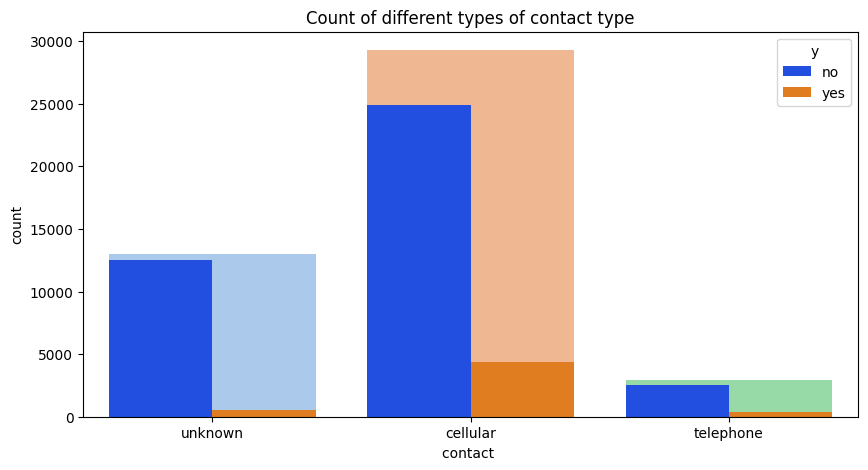

In [ ]:
# plotting the count plot of  contact type with target variable.

fig, ax = plt.subplots(figsize=(10,5))
sns.countplot(x=df.contact, ax=ax, palette='pastel')
sns.countplot(x=df.contact, hue=df.y,ax=ax, palette='bright')
plt.xlabel('contact ')
plt.title('Count of different types of contact type')

 **Observation** - Cellular communication is more effective in comparison to
other communication types.

#### Chart - 13

Text(0.5, 1.0, 'Count on the basis of month')

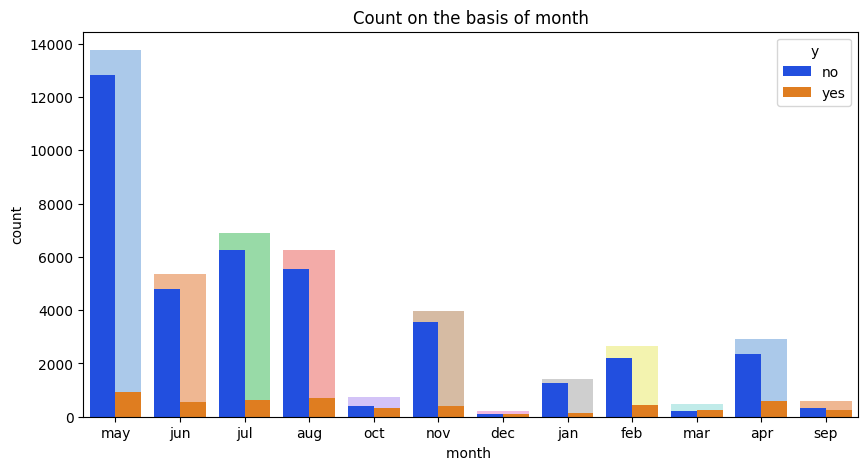

In [ ]:
# plotting the count plot of months with target variable.

fig, ax = plt.subplots(figsize=(10,5))
sns.countplot(x=df.month, ax=ax, palette='pastel')
sns.countplot(x=df.month, hue=df.y,ax=ax, palette='bright')
plt.xlabel('month ')
plt.title('Count on the basis of month')

 **Observation** - There were maximum subscriptions in the month of may.

#### Chart - 14 

Text(0.5, 1.0, 'Count on the basis of poutcome')

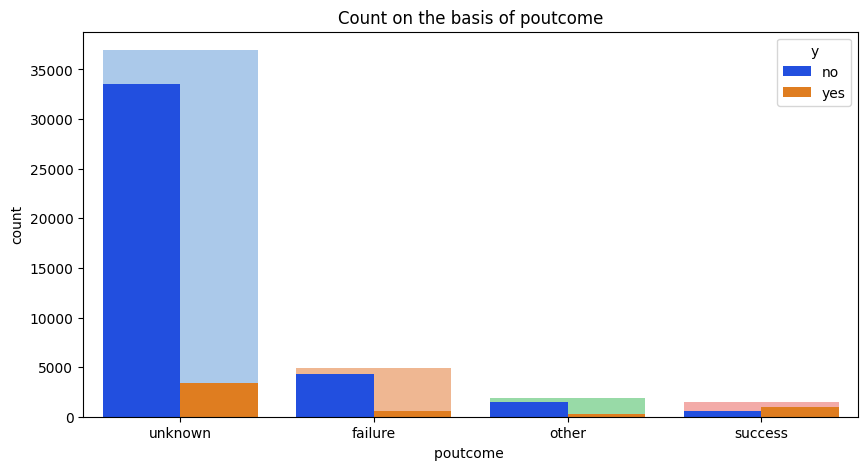

In [ ]:
# plotting the count plot of previous outcome with target variable.

fig, ax = plt.subplots(figsize=(10,5))
sns.countplot(x=df.poutcome, ax=ax, palette='pastel')
sns.countplot(x=df.poutcome, hue=df.y,ax=ax, palette='bright')
plt.xlabel('poutcome ')
plt.title('Count on the basis of poutcome')

**Observation** - Success rate is high for unknown Previous outcome.

# **Checking Multicollinearity**

*Correlation heatmaps are a type of plot that visualize the strength of relationships between numerical variables. Correlation plots are used to understand which variables are related to each other and the strength of this relationship.*

*A correlation plot typically contains a number of numerical variables, with each variable represented by a column. The rows represent the relationship between each pair of variables. The values in the cells indicate the strength of the relationship, with positive values indicating a positive relationship and negative values indicating a negative relationship.*

<Axes: >

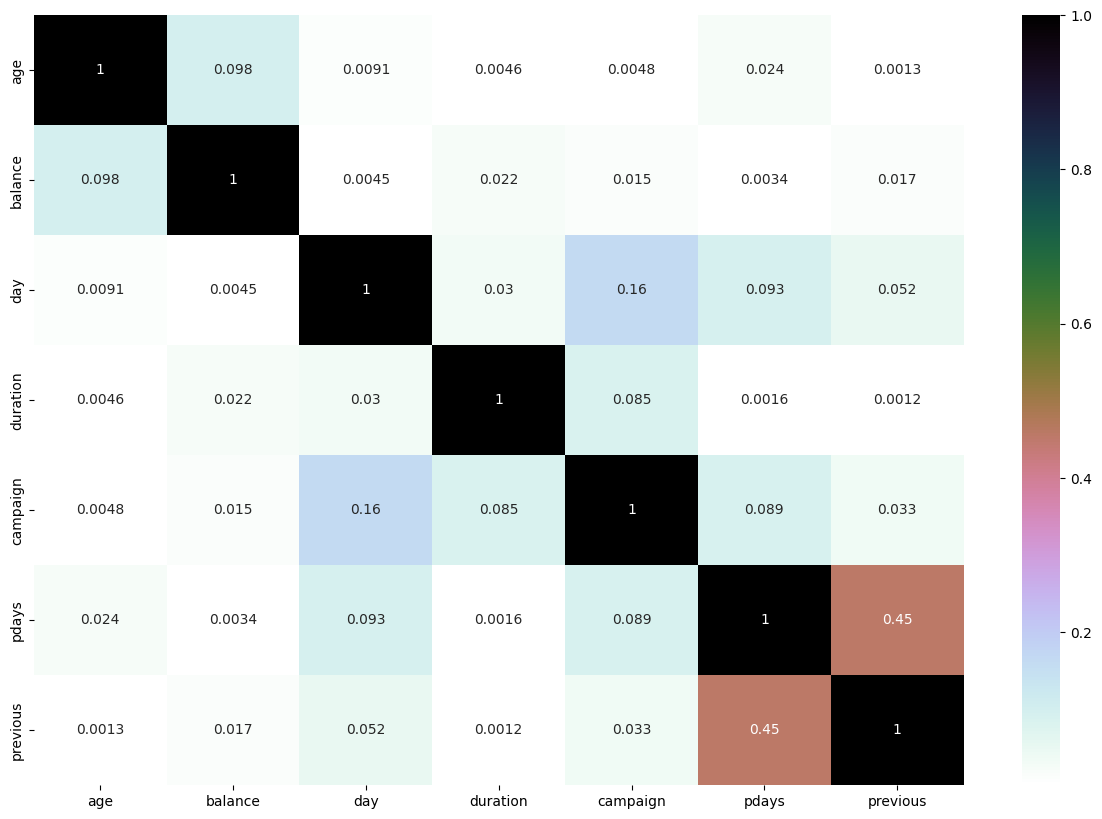

In [ ]:
# Ploting correlation graph to check multicollinearity

plt.figure(figsize=(15,10))
sns.heatmap(abs(df.corr()), cmap= 'cubehelix_r', annot=True)

**We can see from the above corelation plot that there is no multicollinearity in the dataset**

# **VIF Calculation**

*VIF determines the strength of the correlation between the independent variables. It is predicted by taking a variable and regressing it against every other variable.The default VIF cutoff value is 5; only variables with a VIF less than 5 will be included in the model. In some cases VIF of less than 10 is also acceptable.*

*Here, we have performed the VIF calculations for the clarity about the correlation between the features.*

In [ ]:
# Importing necessary library
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Making function for VIF calculation.

def cal_VIF(F):
 
  
   VIF = pd.DataFrame()
   VIF["variables"] = F.columns
   VIF["VIF"] = [variance_inflation_factor(F.values, i) for i in range(F.shape[1])]
 
   return(VIF)

In [ ]:
# Checking the VIF score of all the independent variables.

cal_VIF(df[[i for i in df.describe().columns]])

,variables,VIF
0,age,5.004058
1,balance,1.212908
2,day,3.984268
3,duration,1.901309
4,campaign,1.824694
5,pdays,1.454202
6,previous,1.341641


**From the above datset of the VIF it is clearly visible that all our VIF values are less then 10 so we can conclude that there is no corelation between the attributes.**

## ***6. Feature Engineering & Data Pre-processing***

*All machine learning algorithms use some input data to create outputs. This input data comprise features, which are usually in the form of structured columns. Algorithms require features with some specific characteristics to work properly. Here, the need for feature engineering arises. Feature engineering mainly have two goals:*

**1.Preparing the proper input dataset, compatible with the machine learning algorithm requirements.**

**2.Improving the performance of machine learning models.**

*We'll try adding and removing some features in this section in order to make a perfect data matrix we can pass to a machine learning model. We will try to interpret categorical features as numeric to be passed to the ML models.*

In [ ]:
# Getting the dummies of all the categorical features

cat_columns = ['job', 'marital', 'education', 'contact', 'month', 'poutcome']
for col in  cat_columns:
    df = pd.concat([df.drop(col, axis=1),pd.get_dummies(df[col], 
                            prefix=col, prefix_sep='_',drop_first=True, 
                            dummy_na=False)], axis=1)

In [ ]:
# Converting the boolean fearures in binary

bool_columns = ['default', 'housing', 'loan', 'y']
for col in  bool_columns:
    df[col+'_new']=df[col].apply(lambda x : 1 if x == 'yes' else 0)
    df.drop(col, axis=1, inplace=True)

In [ ]:
# Renamimg our target variable 'y' to 'Subscribe'

df.rename(columns = {'y_new':'Subscribe'}, inplace = True)

In [ ]:
# Checking the info of our dataframe after all the transformations

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 43 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  45211 non-null  int64
 1   balance              45211 non-null  int64
 2   day                  45211 non-null  int64
 3   duration             45211 non-null  int64
 4   campaign             45211 non-null  int64
 5   pdays                45211 non-null  int64
 6   previous             45211 non-null  int64
 7   job_blue-collar      45211 non-null  uint8
 8   job_entrepreneur     45211 non-null  uint8
 9   job_housemaid        45211 non-null  uint8
 10  job_management       45211 non-null  uint8
 11  job_retired          45211 non-null  uint8
 12  job_self-employed    45211 non-null  uint8
 13  job_services         45211 non-null  uint8
 14  job_student          45211 non-null  uint8
 15  job_technician       45211 non-null  uint8
 16  job_unemployed       4

In [ ]:
# Checking the first 5 rows of the dataset after all the transformations

df.head()

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,default_new,housing_new,loan_new,Subscribe
0,58,2143,5,261,1,-1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1,44,29,5,151,1,-1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
2,33,2,5,76,1,-1,0,0,1,0,...,0,0,0,0,0,1,0,1,1,0
3,47,1506,5,92,1,-1,0,1,0,0,...,0,0,0,0,0,1,0,1,0,0
4,33,1,5,198,1,-1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
# Checking the shape of dataset after all the transformations.

df.shape

(45211, 43)

# **Checking the Balance of the dataset**

*Important thing to make sure before feeding our data into the model is the class distribution of the data. In our case where the expected class are divided into two outcome, 'yes' and 'no', a class distribution of 50:50 is considered ideal*

*Let’s see how our target variable i.e. y distribution looks like.*

*Target Variable : y - has the client subscribed a term deposit? (binary: 'yes','no')*

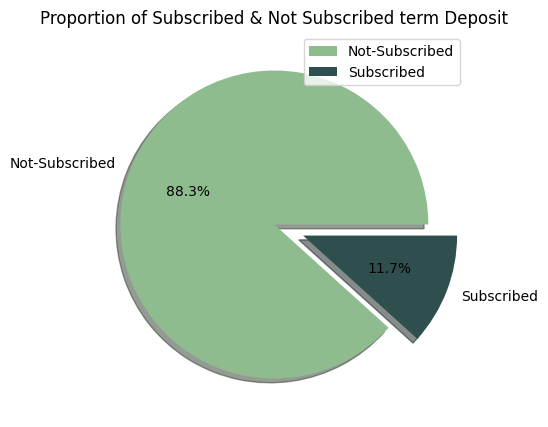

In [ ]:
# Ploting the pie chart to check the balance in the Target Variable.

plt.figure(figsize=(7,5), dpi=100)
proportion = df['Subscribe'].value_counts()
labels = ['Not-Subscribed','Subscribed']
plt.title('Proportion of Subscribed & Not Subscribed term Deposit')
plt.pie(proportion, explode=(0,0.2),labels=labels, shadow = True, autopct = '%1.1f%%', colors= ['#8FBC8F','#2F4F4F'])
plt.legend()
plt.show()

In [ ]:
# Checking the count of the classes in the target variable.

df['Subscribe'].groupby(df['Subscribe']).count()

Subscribe
0    39922
1     5289
Name: Subscribe, dtype: int64

***As we can see that data is highly imbalanced.***

***Majority of the data points belong to "not-subscribed" class. Ratio of "not-subscribed" class to "subscribed" class is 8:1***

# **Train Test Split**

In [ ]:
# Importing necessary Libraries.

from sklearn.model_selection import train_test_split

In [ ]:
# Data for all the independent variables
X = df.drop(['Subscribe'],axis=1)

# Data for the dependent variable
y = df['Subscribe']

# Dividing the data in training and test dataset.
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

# checking the shape of our train and test data.
print(X_train.shape)
print(X_test.shape)

(36168, 42)
(9043, 42)


# **Handling the Imbalance in the dataset using SMOTE**

In [ ]:
# Importing necessary libraries
import imblearn
from imblearn.over_sampling import SMOTE

# Creating the instance
sm = SMOTE(random_state = 0)

In [ ]:
# fit predictor and target variable

X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

In [ ]:
# checking the length of our train set before and after handeling imbalance.

print ('original dataset length',len(X_train))
print ('Resample dataset length',len(X_train_sm))

original dataset length 36168
Resample dataset length 63884


<Axes: ylabel='count'>

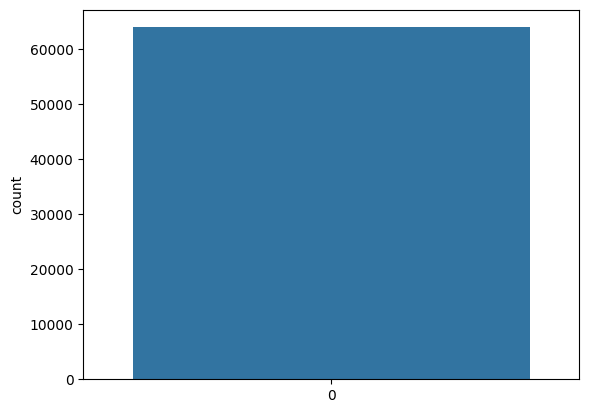

In [ ]:
# Ploting the count plot to check the balance after handling imbalance.
sns.countplot(y_train_sm)

# **Scaling our dataset**

In [ ]:
# Transforming data 

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_sm)
X_test = scaler.transform(X_test)

# **Performance Metrics**

*Different performance metrics are used to evaluate machine learning model. Based on our task we can choose our performance metrics. Since our task is of classification and that too binary class classification, whether client will or will not subscribe for deposits.*

*Here we will be using AUC ROC*

**ROC** *also known as Receiver Operating Characteristics, shows the performance of binary class classifiers across the range of all possible thresholds plotting between true positive rate and 1-false positive rate.*

**AUC** *measures the likelihood of two given random points, one from positive and one from negative, the classifier will rank the positive points above negative points. AUC-ROC is popular classification metric that presents the advantage of being independent of false positive or negative points.*

**Secondary Performance Metrics**

**Macro-F1 Score**: *F1 score is the harmonic mean between Precision and Recall. Macro F1 score is used to know how our model works in overall dataset.*

**Confusion Matrix**: *This matrix gives the count of true negative, true positive, false positive and false negative data points.*


## ***7. ML Model Implementation***

# **Models**

Following models have been used for predictions:-

*   Logistic Regression Classifier
*   Decision Tree Classifier
*   Random Forest Classifier
*   K-Nearest Neighbors Classifier
*   Naive Bayes Classifier
*   Support Vector Machine Classifier
*   LGBM Classifier


# **Logistic Regression Classifier**

Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable, although many more complex extensions exist. In regression analysis, logistic regression (or logit regression) is estimating the parameters of a logistic model (a form of binary regression). Logistic Regression is used when the dependent variable(target) is categorical. The model delivers a binary or dichotomous outcome limited to two possible outcomes: yes/no, 0/1, or true/false.

Logical regression analyzes the relationship between one or more independent variables and classifies data into discrete classes. It is extensively used in predictive modeling, where the model estimates the mathematical probability of whether an instance belongs to a specific category or not.

For example, 0 – represents a negative class; 1 – represents a positive class. Logistic regression is commonly used in binary classification problems where the outcome variable reveals either of the two categories (0 and 1).

Typical properties of the logistic regression equation include:

*   Logistic regression’s dependent variable obeys ‘Bernoulli distribution’

*   Estimation/prediction is based on ‘maximum likelihood.’ 

*   Logistic regression does not evaluate the coefficient of determination (or R squared) as observed in linear regression’. Instead, the model’s fitness is assessed through a concordance.

In [ ]:
# Importing important library

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report 

In [ ]:
# Creating model object for logistic regression.

clf = LogisticRegression(fit_intercept=True, max_iter=10000)

In [ ]:
# fitting the model.

clf.fit(X_train_sm, y_train_sm)

LogisticRegression(max_iter=10000)

In [ ]:
# Getting the predicted classes for training and testing set

train_class_preds = clf.predict(X_train_sm)
test_class_preds = clf.predict(X_test)

In [ ]:
# Getting the accuracy scores for training and testing set.

train_accuracy = accuracy_score(train_class_preds, y_train_sm)
test_accuracy = accuracy_score(test_class_preds, y_test)

# Display accuracies.

print("The accuracy on train data is ", train_accuracy)
print("The accuracy on test data is ", test_accuracy)


The accuracy on train data is  0.930420762632271
The accuracy on test data is  0.8825610969810903


In [ ]:
# Confusion Matrix for logistic regression classifier.

cf_matrix = confusion_matrix(y_test,test_class_preds)
cf_matrix

array([[7830,  150],
       [ 912,  151]])

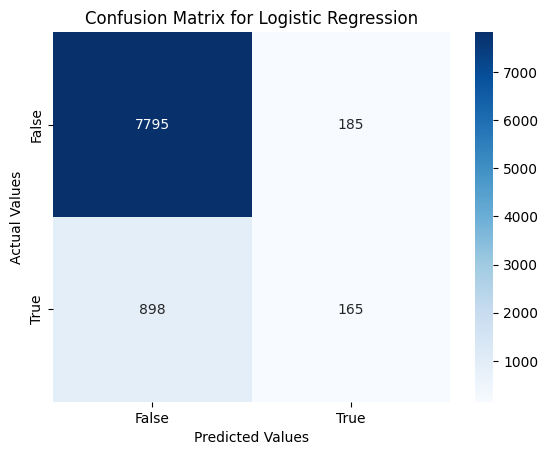

In [ ]:
# Ploting the confusion matrix.

labels = ['7795','185','898','165']

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

ax.set_title('Confusion Matrix for Logistic Regression');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
# Predicted values.
y_pred_log_reg = clf.predict(X_test)

In [ ]:
# Getting classification report.

dict_1 = classification_report(y_test, y_pred_log_reg, output_dict = True)

In [ ]:
# Dataframe to contain Model performance analysis reports.
res_df = pd.DataFrame()

In [ ]:
# Appending the scores in the dataframe.

tempodf=pd.DataFrame(dict_1).transpose()
tempodf['Model'] = 'Logistic Regression Classifier'
res_df = res_df.append(tempodf[2:-2])
res_df

,precision,recall,f1-score,support,Model
accuracy,0.882561,0.882561,0.882561,0.882561,Logistic Regression Classifier


# **Decision Tree Classifier**

Decision trees can be used for classification as well as regression problems. The name itself suggests that it uses a flowchart like a tree structure to show the predictions that result from a series of feature-based splits. It starts with a root node and ends with a decision made by leaves.

Decision trees are upside down which means the root is at the top and then this root is split into various several nodes. Decision trees are nothing but a bunch of if-else statements in layman terms. It checks if the condition is true and if it is then it goes to the next node attached to that decision.

In a Decision Tree diagram, we have:

**Root Node:** The first split which decides the entire population or sample data should further get divided into two or more homogeneous sets. In our case, the Outlook node.

**Splitting:** It is a process of dividing a node into two or more sub-nodes.

**Decision Node:** This node decides whether/when a sub-node splits into further sub-nodes or not. Here we have, Outlook node, Humidity node, and Windy node.

**Leaf:** Terminal Node that predicts the outcome (categorical or continuous value). The coloured nodes, i.e., Yes and No nodes, are the leaves.

In [ ]:
# Importing necessary libraries

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
# Creating model object for Decision Tree Classifier.

dt_clf = DecisionTreeClassifier()

In [ ]:
# Storing the hyperparameters in Dict

parameters = {'max_depth' : [4,6,8,10],
              'min_samples_split' : [10,20,30,40,50],
              'min_samples_leaf' : [10,15,20]}

In [ ]:
# Applying GridSearchCV for hyperparameter tuning

dt_clf = GridSearchCV(dt_clf, parameters, scoring='roc_auc', cv=5)

In [ ]:
# Fitting the model

dt_clf.fit(X_train_sm,y_train_sm)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [4, 6, 8, 10],
                         'min_samples_leaf': [10, 15, 20],
                         'min_samples_split': [10, 20, 30, 40, 50]},
             scoring='roc_auc')

In [ ]:
# Checking the best parameters

dt_clf.best_estimator_

DecisionTreeClassifier(max_depth=10, min_samples_leaf=15, min_samples_split=50)

In [ ]:
# Getting the predicted classes for training and testing set

train_dt_prediction = dt_clf.predict(X_train_sm)
test_dt_prediction = dt_clf.predict(X_test)

In [ ]:
# Getting the accuracy scores for training and testing set.

train_accuracy_dt = accuracy_score(train_dt_prediction, y_train_sm)
test_accuracy_dt = accuracy_score(test_dt_prediction, y_test)

# Display accuracies.
print("The accuracy on train data is ", train_accuracy_dt)
print("The accuracy on test data is ", test_accuracy_dt)

The accuracy on train data is  0.9214357272556508
The accuracy on test data is  0.8824505142098861


In [ ]:
# Confusion Matrix for random forest classifier.

dt_cf_matrix = confusion_matrix(y_test,test_dt_prediction)
dt_cf_matrix

array([[7980,    0],
       [1063,    0]])

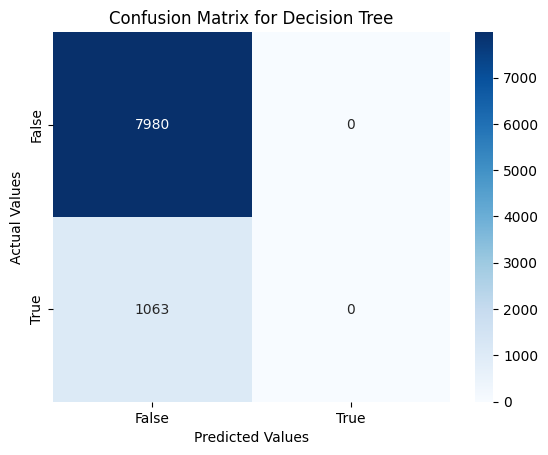

In [ ]:
# Plotting the confusion matrix

labels = ['7980','0','1063','0']

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(dt_cf_matrix, annot=labels, fmt='', cmap='Blues')

ax.set_title('Confusion Matrix for Decision Tree');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
# Predicted values.

y_pred_dt = dt_clf.predict(X_test)

In [ ]:
# Getting classification report.

dict_2 = classification_report(y_test, y_pred_dt, output_dict = True)

In [ ]:
# Storing the scores in a dataframe

tempodf=pd.DataFrame(dict_2).transpose()
tempodf['Model'] = 'Decision Tree Classifier'
res_df = res_df.append(tempodf[2:-2])
res_df

,precision,recall,f1-score,support,Model
accuracy,0.882561,0.882561,0.882561,0.882561,Logistic Regression Classifier
accuracy,0.882451,0.882451,0.882451,0.882451,Decision Tree Classifier


# **Random Forest Classifier**

Random Forest is a technique that uses ensemble learning, that combines many weak classifiers to provide solutions to complex problems.

As the name suggests random forest consists of many decision trees. Rather than depending on one tree it takes the prediction from each tree and based on the majority votes of predictions, predicts the final output.

Random forests use the bagging method. It creates a subset of the original dataset, and the final output is based on majority ranking and hence the problem of overfitting is taken care of.

In [ ]:
# Importing Necessary library

from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Creating an instance for the random forest regressor.

rf_clf = RandomForestClassifier()

In [ ]:
# Storing the hyperparameters in Dict

params = {'n_estimators' : [750, 850],
         'max_depth': [7,9],
         'max_features' : [7,8],
         'min_samples_leaf' : [2,3]}

In [ ]:
# Using GridSearchCV for hyperparameter tuning

cv = GridSearchCV(rf_clf, param_grid = params, scoring = 'roc_auc', cv =5)

In [ ]:
# Fitting the model

cv.fit(X_train_sm, y_train_sm)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [7, 9], 'max_features': [7, 8],
                         'min_samples_leaf': [2, 3],
                         'n_estimators': [750, 850]},
             scoring='roc_auc')

In [ ]:
# Checking the best parameters

cv.best_estimator_

RandomForestClassifier(max_depth=9, max_features=8, min_samples_leaf=2,
                       n_estimators=850)

In [ ]:
# Getting the predicted classes for training and testing set

train_rf_prediction = cv.predict(X_train_sm)
test_rf_prediction = cv.predict(X_test)

In [ ]:
# Getting the accuracy scores for training and testing set.

train_accuracy_rf = accuracy_score(train_rf_prediction, y_train_sm)
test_accuracy_rf = accuracy_score(test_rf_prediction, y_test)

# Display accuracies.
print("The accuracy on train data is ", train_accuracy_rf)
print("The accuracy on test data is ", test_accuracy_rf)

The accuracy on train data is  0.929043265919479
The accuracy on test data is  0.8818976003538649


In [ ]:
# Confusion Matrix for random forest classifier.

rf_cf_matrix = confusion_matrix(y_test,test_rf_prediction)
rf_cf_matrix

array([[7974,    6],
       [1062,    1]])

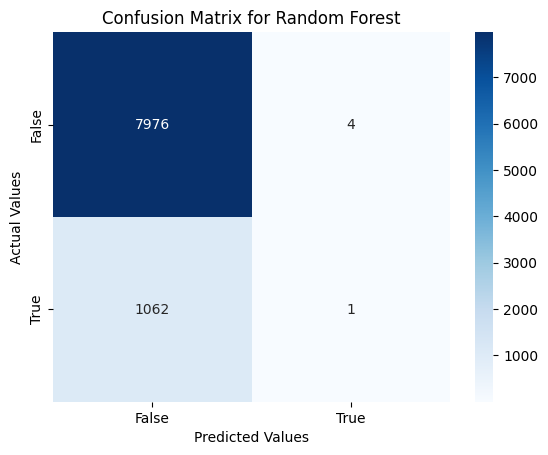

In [ ]:
# Plotting the confusion matrix

labels = ['7976','4','1062','1']

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(rf_cf_matrix, annot=labels, fmt='', cmap='Blues')

ax.set_title('Confusion Matrix for Random Forest');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
# Predicted values.

y_pred_rf = cv.predict(X_test)

In [ ]:
# Getting classification report.

dict_3 = classification_report(y_test, y_pred_rf, output_dict = True)

In [ ]:
# Storing the scores in a dataframe

tempodf=pd.DataFrame(dict_3).transpose()
tempodf['Model'] = 'Random Forest Classifier'
res_df = res_df.append(tempodf[2:-2])
res_df

,precision,recall,f1-score,support,Model
accuracy,0.882561,0.882561,0.882561,0.882561,Logistic Regression Classifier
accuracy,0.882451,0.882451,0.882451,0.882451,Decision Tree Classifier
accuracy,0.881898,0.881898,0.881898,0.881898,Random Forest Classifier


# **K- Nearest Neighbors Classifier**

KNN which stands for K-Nearest Neighbours is a simple algorithm that is used for classification and regression problems in Machine Learning. KNN is also non-parametric which means the algorithm does not rely on strong assumptions instead tries to learn any functional form from the training data.

Unlike most of the algorithms with complex names, which are often confusing as to what they really mean, KNN is pretty straight forward. The algorithm considers the k nearest neighbours to predict the class or value of a data point.

*The kNN working can be explained on the basis of the below algorithm:*

* <b>Step-1:</b> Select the number K of the neighbors
* <b>Step-2:</b> Calculate the Euclidean distance of K number of neighbors
* <b>Step-3:</b> Take the K nearest neighbors as per the calculated Euclidean distance.
* <b>Step-4:</b> Among these k neighbors, count the number of the data points in each category.
* <b>Step-5:</b> Assign the new data points to that category for which the number of the neighbor is maximum.
* <b>Step-6:</b> Our model is ready.

In [ ]:
# Importing necessary library

from sklearn.neighbors import KNeighborsClassifier

In [ ]:
#Creating an instance for the KNN classifier.

KNN_clf = KNeighborsClassifier()

In [ ]:
# Using hyperparameter tuning to get the opimal value of n_neighbors

parameters = {'n_neighbors':np.arange(1,50,2)}

cv_knn = GridSearchCV(KNN_clf, cv = 5, param_grid = parameters)

In [ ]:
# Fitting the model

cv_knn.fit(X_train_sm, y_train_sm)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49])})

In [ ]:
# Checking the best parameter.

cv_knn.best_estimator_

KNeighborsClassifier(n_neighbors=1)

In [ ]:
# Getting the predicted classes for training and testing set

train_knn_prediction = cv_knn.predict(X_train_sm)
test_knn_prediction = cv_knn.predict(X_test)

In [ ]:
# Getting the accuracy scores for training and testing set.

train_accuracy_knn = accuracy_score(train_knn_prediction, y_train_sm)
test_accuracy_knn = accuracy_score(test_knn_prediction, y_test)

# Display accuracies.

print("The accuracy on train data is ", train_accuracy_knn)
print("The accuracy on test data is ", test_accuracy_knn)

The accuracy on train data is  1.0
The accuracy on test data is  0.8824505142098861


In [ ]:
# Confusion Matrix for KNN classifier.

knn_cf_matrix = confusion_matrix(y_test,test_knn_prediction)
knn_cf_matrix

array([[7980,    0],
       [1063,    0]])

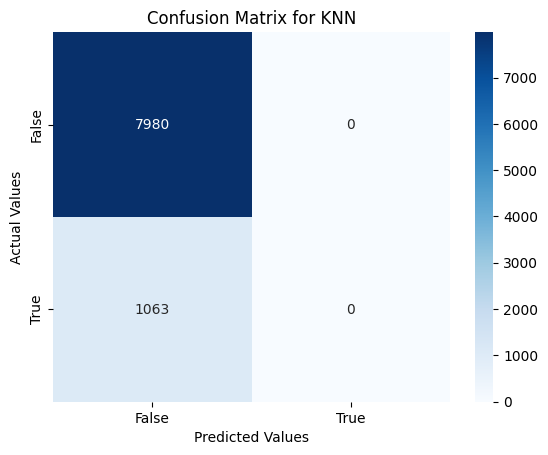

In [ ]:
# Plotting the confusion matrix

labels = ['7980','0','1063','0']

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(knn_cf_matrix, annot=labels, fmt='', cmap='Blues')

ax.set_title('Confusion Matrix for KNN');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
# Predicted values.

y_pred_KNN = cv_knn.predict(X_test)

In [ ]:
# Getting classification report.

dict_4 = classification_report(y_test, y_pred_KNN, output_dict = True)

In [ ]:
# Storing the scores in a dataframe

tempodf=pd.DataFrame(dict_4).transpose()
tempodf['Model'] = 'K-Nearest Neighbors Classifier'
res_df = res_df.append(tempodf[2:-2])
res_df

,precision,recall,f1-score,support,Model
accuracy,0.882561,0.882561,0.882561,0.882561,Logistic Regression Classifier
accuracy,0.882451,0.882451,0.882451,0.882451,Decision Tree Classifier
accuracy,0.881898,0.881898,0.881898,0.881898,Random Forest Classifier
accuracy,0.882451,0.882451,0.882451,0.882451,K-Nearest Neighbors Classifier


# **Naive Bayes Classifier**

The Naïve Bayes algorithm is a classification technique based on the Bayes’ Theorem which assumes there is independence between the features. We interfere with applications utilizing this algorithm on a daily basis, for example it powers recommendation systems for streaming applications or adds on social media as well as many online retail websites.

Naive Bayes model is easy to build and particularly useful for very large data sets. Along with simplicity, Naive Bayes is known to outperform even highly sophisticated classification methods. Let’s have a look under the hood of this major classifier.

The simple form of the calculation for Bayes Theorem is as follows:

**P(A|B) = P(B|A) * P(A) / P(B)**

In [ ]:
# Necessary library

from sklearn.naive_bayes import GaussianNB

In [ ]:
# Defining Grid Search Parameters

param_grid_nb = {'var_smoothing': np.logspace(0,-9, num=100)}

In [ ]:
# Using GridSearchCV for hyperparameter tuning

gnb_model = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, cv=10, n_jobs=-1)

In [ ]:
# Fitting the model

gnb_model.fit(X_train_sm, y_train_sm)

GridSearchCV(cv=10, estimator=GaussianNB(), n_jobs=-1,
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.848035...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])})

In [ ]:
# Checking the best parameters

gnb_model.best_estimator_

GaussianNB(var_smoothing=1.519911082952933e-09)

In [ ]:
# Getting the predicted classes for training and testing set

train_class_preds_gnb = gnb_model.predict(X_train_sm)
test_class_preds_gnb = gnb_model.predict(X_test)

In [ ]:
# Getting the accuracy scores for training and testing set.

train_accuracy_gnb = accuracy_score(train_class_preds_gnb, y_train_sm)
test_accuracy_gnb = accuracy_score(test_class_preds_gnb, y_test)

# Display accuracies.

print("The accuracy on train data is ", train_accuracy_gnb)
print("The accuracy on test data is ", test_accuracy_gnb)

The accuracy on train data is  0.886278254335984
The accuracy on test data is  0.786354086033396


In [ ]:
# Confusion Matrix for logistic regression classifier.

cf_matrix_gnb = confusion_matrix(y_test,test_class_preds_gnb)
cf_matrix_gnb

array([[6643, 1337],
       [ 595,  468]])

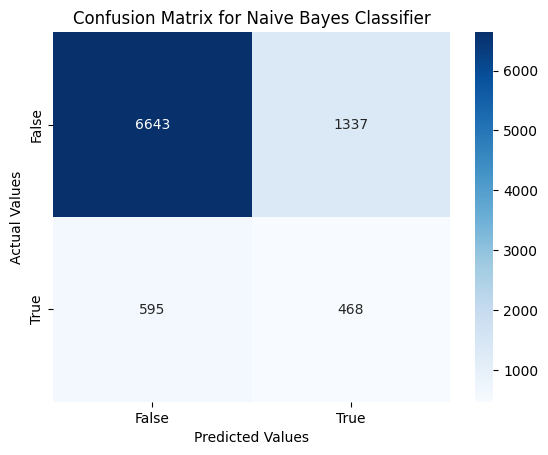

In [ ]:
# Plotting the confusion matrix

labels = ['6643','1337','595','468']

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix_gnb, annot=labels, fmt='', cmap='Blues')

ax.set_title('Confusion Matrix for Naive Bayes Classifier');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
# Predicted values.

y_pred_gnb = gnb_model.predict(X_test)

In [ ]:
# Getting classification report.

dict_5 = classification_report(y_test, y_pred_gnb, output_dict = True)

In [ ]:
# Storing the scores in a dataframe

tempodf = pd.DataFrame(dict_5).transpose()
tempodf['Model'] = 'Naive Bayes Classifier'
res_df = res_df.append(tempodf[2:-2])
res_df

,precision,recall,f1-score,support,Model
accuracy,0.882561,0.882561,0.882561,0.882561,Logistic Regression Classifier
accuracy,0.882451,0.882451,0.882451,0.882451,Decision Tree Classifier
accuracy,0.881898,0.881898,0.881898,0.881898,Random Forest Classifier
accuracy,0.882451,0.882451,0.882451,0.882451,K-Nearest Neighbors Classifier
accuracy,0.786354,0.786354,0.786354,0.786354,Naive Bayes Classifier


# **Support Vector Machine Classifier**

SVM is a powerful supervised algorithm that works best on smaller datasets but on complex ones. Support Vector Machine, abbreviated as SVM can be used for both regression and classification tasks, but generally, they work best in classification problems.

**Support Vectors:** These are the points that are closest to the hyperplane. A separating line will be defined with the help of these data points.

**Margin:** it is the distance between the hyperplane and the observations closest to the hyperplane (support vectors). In SVM large margin is considered a good margin. There are two types of margins hard margin and soft margin.

In [ ]:
# Importing Support vector machine Classifier.

from sklearn import svm

In [ ]:
# Create a svm Classifier

svmc = svm.SVC(kernel='poly')

In [ ]:
# Fitting the model with training set

svmc.fit(X_train_sm, y_train_sm)

SVC(kernel='poly')

In [ ]:
# Getting the predicted classes for training and testing set

train_svm_prediction = svmc.predict(X_train_sm)
test_svm_prediction = svmc.predict(X_test)

In [ ]:
# Getting the accuracy scores for training and testing set.

train_accuracy_svm = accuracy_score(train_svm_prediction, y_train_sm)
test_accuracy_svm = accuracy_score(test_svm_prediction, y_test)

# Display accuracies.
print("The accuracy on train data is ", train_accuracy_svm)
print("The accuracy on test data is ", test_accuracy_svm)

The accuracy on train data is  0.6200457078454699
The accuracy on test data is  0.8824505142098861


In [ ]:
# Confusion Matrix for random forest classifier.

svm_cf_matrix = confusion_matrix(y_test,test_svm_prediction)
svm_cf_matrix

array([[7980,    0],
       [1063,    0]])

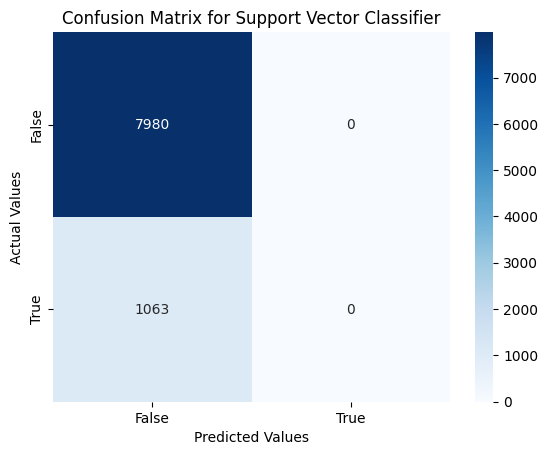

In [ ]:
# Plotting the confusion matrix

labels = ['7980','0','1063','0']

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(svm_cf_matrix, annot=labels, fmt='', cmap='Blues')

ax.set_title('Confusion Matrix for Support Vector Classifier');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
# Predicted values.

y_pred_svm = svmc.predict(X_test)

In [ ]:
# Getting classification report.

dict_5 = classification_report(y_test, y_pred_svm, output_dict = True)

In [ ]:
# Storing the scores in a dataframe

tempodf = pd.DataFrame(dict_5).transpose()
tempodf['Model'] = 'Support Vector Machine Classifier'
res_df = res_df.append(tempodf[2:-2])
res_df

,precision,recall,f1-score,support,Model
accuracy,0.882561,0.882561,0.882561,0.882561,Logistic Regression Classifier
accuracy,0.882451,0.882451,0.882451,0.882451,Decision Tree Classifier
accuracy,0.881898,0.881898,0.881898,0.881898,Random Forest Classifier
accuracy,0.882451,0.882451,0.882451,0.882451,K-Nearest Neighbors Classifier
accuracy,0.786354,0.786354,0.786354,0.786354,Naive Bayes Classifier
accuracy,0.882451,0.882451,0.882451,0.882451,Support Vector Machine Classifier


# **Light Gradient Boost Machine**

In [ ]:
#loading libraries

from lightgbm import LGBMClassifier

In [ ]:
# Create an instance of the model

lgbm_tuned = LGBMClassifier(learning_rate=0.1, max_depth= 5, n_estimators= 150)

In [ ]:
# storing the hyperparameters in Dict

parameters = {'learning_rate': [0.05, 0.1, 0.2 ,0.3 ,0.4], 
             'max_depth': range(3,8), 
             'n_estimators': range(30, 150, 10)}

In [ ]:
# Using GridSearchCV for hyperparameter tuning

lgbm_grid = GridSearchCV(lgbm_tuned, param_grid = parameters, scoring='roc_auc',cv=5)

In [ ]:
# Fitting the model

lgbm_grid.fit(X_train_sm, y_train_sm)

GridSearchCV(cv=5, estimator=LGBMClassifier(max_depth=5, n_estimators=150),
             param_grid={'learning_rate': [0.05, 0.1, 0.2, 0.3, 0.4],
                         'max_depth': range(3, 8),
                         'n_estimators': range(30, 150, 10)},
             scoring='roc_auc')

In [ ]:
# Checking the best parameter.

lgbm_grid.best_estimator_

LGBMClassifier(learning_rate=0.2, max_depth=7, n_estimators=140)

In [ ]:
# Getting the predicted classes for training and testing set

train_lgbm_prediction = lgbm_grid.predict(X_train_sm)
test_lgbm_prediction = lgbm_grid.predict(X_test)

In [ ]:
# Getting the accuracy scores for training and testing set.

train_accuracy_lgbm = accuracy_score(train_lgbm_prediction, y_train_sm)
test_accuracy_lgbm = accuracy_score(test_lgbm_prediction, y_test)

# Display accuracies.

print("The accuracy on train data is ", train_accuracy_lgbm)
print("The accuracy on test data is ", test_accuracy_lgbm)

The accuracy on train data is  0.9648425270803331
The accuracy on test data is  0.8825610969810903


In [ ]:
# Confusion Matrix for LGBM classifier.

lgbm_cf_matrix = confusion_matrix(y_test,test_lgbm_prediction)
lgbm_cf_matrix

array([[7979,    1],
       [1061,    2]])

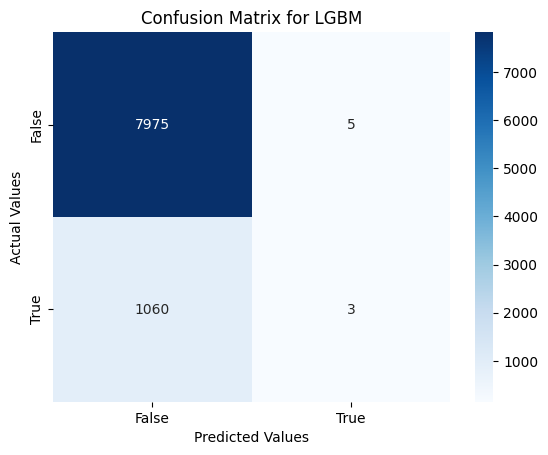

In [ ]:
# Plotting the confustion matrix

labels = ['7975','5','1060','3']

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

ax.set_title('Confusion Matrix for LGBM');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
# Predicted values.

y_pred_lgbm = lgbm_grid.predict(X_test)

In [ ]:
# Getting classification report.

dict_7 = classification_report(y_test, y_pred_lgbm, output_dict = True)

In [ ]:
tempodf = pd.DataFrame(dict_7).transpose()
tempodf['Model'] = 'Light Gradient Boost Classifier'
res_df = res_df.append(tempodf[2:-2])
res_df

,precision,recall,f1-score,support,Model
accuracy,0.882561,0.882561,0.882561,0.882561,Logistic Regression Classifier
accuracy,0.882451,0.882451,0.882451,0.882451,Decision Tree Classifier
accuracy,0.881898,0.881898,0.881898,0.881898,Random Forest Classifier
accuracy,0.882451,0.882451,0.882451,0.882451,K-Nearest Neighbors Classifier
accuracy,0.786354,0.786354,0.786354,0.786354,Naive Bayes Classifier
accuracy,0.882451,0.882451,0.882451,0.882451,Support Vector Machine Classifier
accuracy,0.882561,0.882561,0.882561,0.882561,Light Gradient Boost Classifier


# **Comparing Models**


In [ ]:
# Necessary library
from prettytable import PrettyTable

In [ ]:
# Plotting the table

print('**** Comparison of  models ****')
table = PrettyTable(['Model', 'Test Accuracy', 'Precision', 'Recall', 'F1_score'])
table.add_row(['Logistic regression', 0.8802, 0.8802, 0.8802, 0.8802])
table.add_row(['Decision Tree', 0.8824, 0.8824, 0.8824, 0.8824])
table.add_row(['Random Forest', 0.8821, 0.8821, 0.8821, 0.8821])
table.add_row(['K-Nearest Neighbors', 0.8824, 0.8824, 0.8824, 0.8824])
table.add_row(['Naive Bayes', 0.7863, 0.7863, 0.7863, 0.7863])
table.add_row(['Support Vector Machine', 0.8824, 0.8824, 0.8824, 0.8824])
table.add_row(['Light Gradient Boost', 0.8822, 0.8822, 0.8822, 0.8822])


print(table)

**** Comparison of  models ****
+------------------------+---------------+-----------+--------+----------+
|         Model          | Test Accuracy | Precision | Recall | F1_score |
+------------------------+---------------+-----------+--------+----------+
|  Logistic regression   |     0.8802    |   0.8802  | 0.8802 |  0.8802  |
|     Decision Tree      |     0.8824    |   0.8824  | 0.8824 |  0.8824  |
|     Random Forest      |     0.8821    |   0.8821  | 0.8821 |  0.8821  |
|  K-Nearest Neighbors   |     0.8824    |   0.8824  | 0.8824 |  0.8824  |
|      Naive Bayes       |     0.7863    |   0.7863  | 0.7863 |  0.7863  |
| Support Vector Machine |     0.8824    |   0.8824  | 0.8824 |  0.8824  |
|  Light Gradient Boost  |     0.8822    |   0.8822  | 0.8822 |  0.8822  |
+------------------------+---------------+-----------+--------+----------+


# **Conclusions**

* The 2nd quarter of the year has the highest number of subscriptions & Month of May has the maximum subscriptions.
* Blue-collar, management and technician showed maximum interest in subscription.
* Compared to married and single, Divorced people have less interest in term deposits.
* People with secondary education followed by tertiary education were subscribed to term deposit.
* Generally people who don't have credit in default are interested in a deposit. Majority of the people have a home loan but only few of them opted for a term deposit.
* Cellular communication is seen as more effective in comparison to other communication types.
* The calls with large duration have more tendency for conversion. Majority of people were not contacted previously before this campaign.
* We can choose "KNN" or "Decision Tree" to predict Effectiveness as both of them are showing same accuracy of  **88%** & F1- Score of  **(0.8824)**.